Learning how NenuPy works

In [9]:
import warnings
warnings.filterwarnings('ignore')

from nenupy.io import Spectra
from nenupy.io.tf import Spectra, TFTask, TFPipeline
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import astropy.units as u
from astropy.time import Time
from datetime import datetime

# set the directory path where the data is importe/stored
data_dir = '/databf/nenufar-tf/LT11'
year     = '2025'
month    = '03'
obs_dir  = '20250325_091200_20250325_145000_SUN_TRACKING'

In [2]:
spectra_file = sorted(glob.glob(f'{data_dir}/{year}/{month}/{obs_dir}/*.spectra'))
print(*spectra_file, sep='\n')

/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra
/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_1.spectra


In [156]:
filename = [file for file in spectra_file if file.endswith('_0.spectra')][0]

sp = Spectra(filename)

2025-04-29 17:16:53 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-29 17:16:53 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-29 17:16:53 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-29 17:16:54 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-29 17:16:54 | INFO: Computing time-frequency axes...
2025-04-29 17:16:54 | INFO: Re-organize data into Jones matrices...
2025-04-29 17:16:54 | INFO: 	Convert data to Dask array
2025-04-29 17:16:54 | INFO: Data loaded.


In [157]:
sp.info()

filename: /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra
time_min: 2025-03-25T09:13:12.0000103
time_max: 2025-03-25T14:49:34.7391155
dt: 20.97152 ms
frequency_min: 21.6796875 MHz
frequency_max: 59.1796875 MHz
df: 6.103515625 kHz
Available beam indices: ['0']


In [158]:
sp.pipeline.info()

Pipeline configuration:
	0 - Correct bandpass
	(1 - Remove subband channels)
	(2 - Rebin in time)
	(3 - Rebin in frequency)
	4 - Compute Stokes parameters


2025-04-29 17:16:54 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-29 17:16:54 | INFO: 	2385 time samples selected.
2025-04-29 17:16:54 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-29 17:16:54 | INFO: 	352 frequency samples selected.
2025-04-29 17:16:54 | INFO: Pipeline configuration:
	0 - Correct bandpass
	(1 - Remove subband channels)
	(2 - Rebin in time)
	(3 - Rebin in frequency)
	4 - Compute Stokes parameters
2025-04-29 17:16:54 | INFO: Correcting for bandpass...
2025-04-29 17:16:54 | INFO: Computing Stokes parameters I...
2025-04-29 17:16:54 | INFO: 	Stokes I computed.
2025-04-29 17:16:54 | INFO: Computing the data (estimated volume: 6.4 Mibyte)...
[########################################] | 100% Completed | 205.10 ms
2025-04-29 17:16:54 | INFO: 	Data of shape (time, frequency, (polarization)) = (2385, 352, 1) produced.


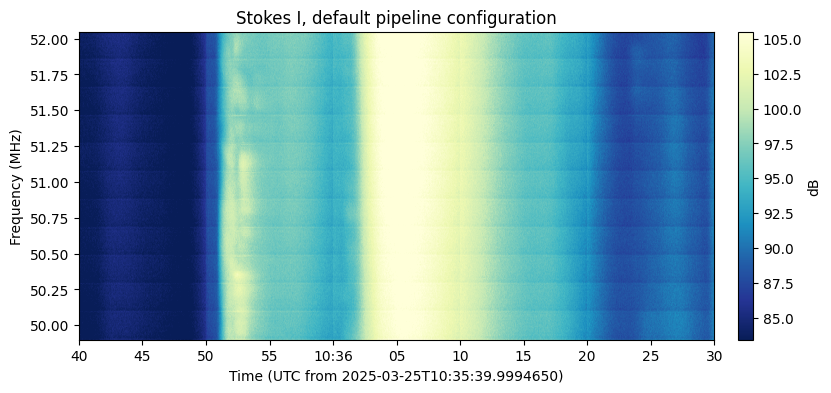

In [159]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get(stokes='I')
data.plot(figsize=[10,4], title='Stokes I, default pipeline configuration')

In [160]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.correct_bandpass())
sp.pipeline.info()

2025-04-29 17:16:56 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-29 17:16:56 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-29 17:16:56 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-29 17:16:56 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-29 17:16:56 | INFO: Computing time-frequency axes...
2025-04-29 17:16:56 | INFO: Re-organize data into Jones matrices...
2025-04-29 17:16:56 | INFO: 	Convert data to Dask array
2025-04-29 17:16:56 | INFO: Data loaded.
Pipeline configuration:
	0 - Correct bandpass


2025-04-29 17:16:58 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-29 17:16:58 | INFO: 	2385 time samples selected.
2025-04-29 17:16:58 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-29 17:16:58 | INFO: 	352 frequency samples selected.
2025-04-29 17:16:58 | INFO: Pipeline configuration:
	0 - Correct bandpass
2025-04-29 17:16:58 | INFO: Correcting for bandpass...
2025-04-29 17:16:58 | INFO: Computing the data (estimated volume: 5.1e+01 Mibyte)...
[########################################] | 100% Completed | 205.47 ms
2025-04-29 17:16:58 | INFO: 	Data of shape (time, frequency, (polarization)) = (2385, 352, 2, 2) produced.
2025-04-29 17:16:58 | WARNING: Complex array found, only the real part is plotted.


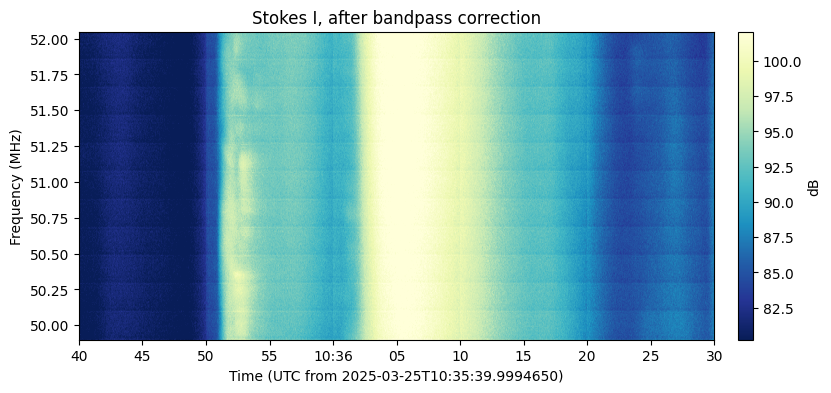

In [161]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get(stokes='I')
data.plot(figsize=[10,4], title='Stokes I, after bandpass correction')

In [208]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.flatten_subband())
sp.pipeline.info()

2025-04-30 11:59:54 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-30 11:59:54 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-30 11:59:54 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-30 11:59:55 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-30 11:59:55 | INFO: Computing time-frequency axes...
2025-04-30 11:59:55 | INFO: Re-organize data into Jones matrices...
2025-04-30 11:59:55 | INFO: 	Convert data to Dask array
2025-04-30 11:59:55 | INFO: Data loaded.
Pipeline configuration:
	0 - Flatten subband


2025-04-30 11:59:55 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-30 11:59:55 | INFO: 	2385 time samples selected.
2025-04-30 11:59:55 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-30 11:59:55 | INFO: 	352 frequency samples selected.
2025-04-30 11:59:55 | INFO: Pipeline configuration:
	0 - Flatten subband
2025-04-30 11:59:55 | INFO: Computing the data (estimated volume: 5.1e+01 Mibyte)...
[########################################] | 100% Completed | 408.74 ms
2025-04-30 11:59:56 | INFO: 	Data of shape (time, frequency, (polarization)) = (2385, 352, 2, 2) produced.
2025-04-30 11:59:56 | WARNING: Complex array found, only the real part is plotted.


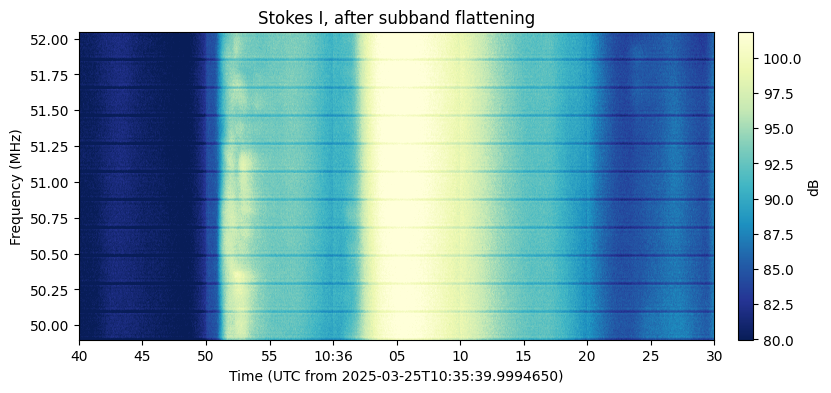

In [209]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get(stokes='I')
data.plot(figsize=[10,4], title='Stokes I, after subband flattening')

2025-04-30 12:42:25 | WARNING: Complex array found, only the real part is plotted.


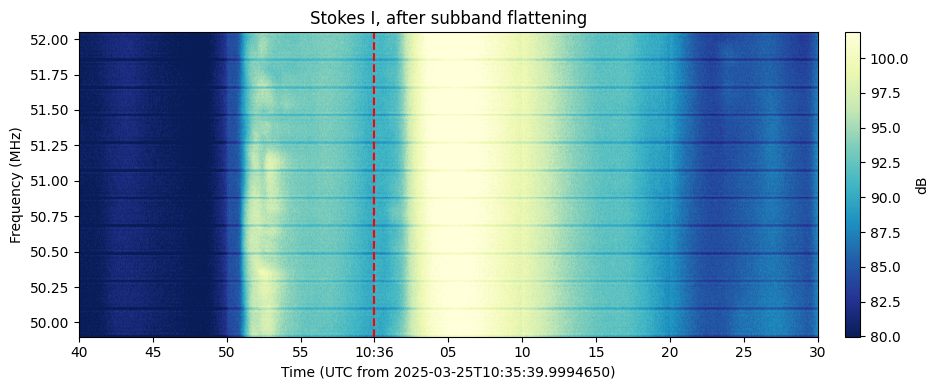

In [302]:
# Plot vertical line at that time
chosen_time_str = '2025-03-25 10:36:00'
chosen_time = mdates.date2num(datetime.strptime(chosen_time_str, '%Y-%m-%d %H:%M:%S'))

fig = plt.figure(figsize=[10,4])
ax  = fig.add_subplot(111)
data.plot(ax=ax, title='Stokes I, after subband flattening')
ax.axvline(x=chosen_time, c='r', ls='--')
fig.tight_layout()
plt.show()

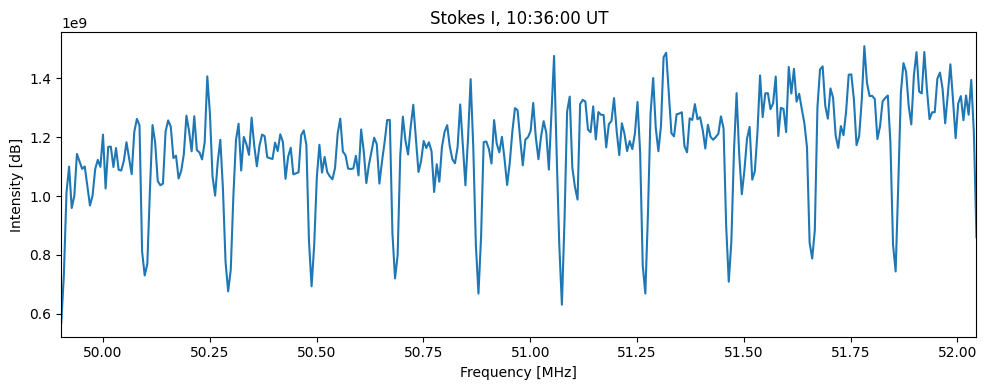

In [321]:
# Extract the frequencies from the data
freqs = data.freq.to_value()/1e6
# Extract the times from the data
times = np.array([datetime.utcfromtimestamp(t) for t in data.time.unix])
# Convert float back to datetime
chosen_dt = mdates.num2date(chosen_time).replace(tzinfo=None)
# Find the nearest index in the time axis
time_index = np.argmin(np.abs(times - chosen_dt))
# Extract the intensity profile at that time
intensity_profile = data.data[time_index, :]

# Plot frequency profile
plt.figure(figsize=[10,4])
plt.plot(freqs, intensity_profile[:,0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Intensity [dB]')
plt.title(f'Stokes I, {chosen_dt.time()} UT')
# plt.yscale('log')
plt.xlim(freqs[0], freqs[-1])
plt.tight_layout()
plt.show()

In [316]:
intensity_profile.shape

(352, 4)

In [254]:
fluxes = data.data
fluxes.shape

(2385, 352, 4)

In [271]:
print('times shape:', np.shape(times))
print('freqs shape:', np.shape(freqs))
print('fluxes[:,:,0] shape:', np.shape(fluxes[:,:,0]))

times shape: (2385,)
freqs shape: (352,)
fluxes[:,:,0] shape: (2385, 352)


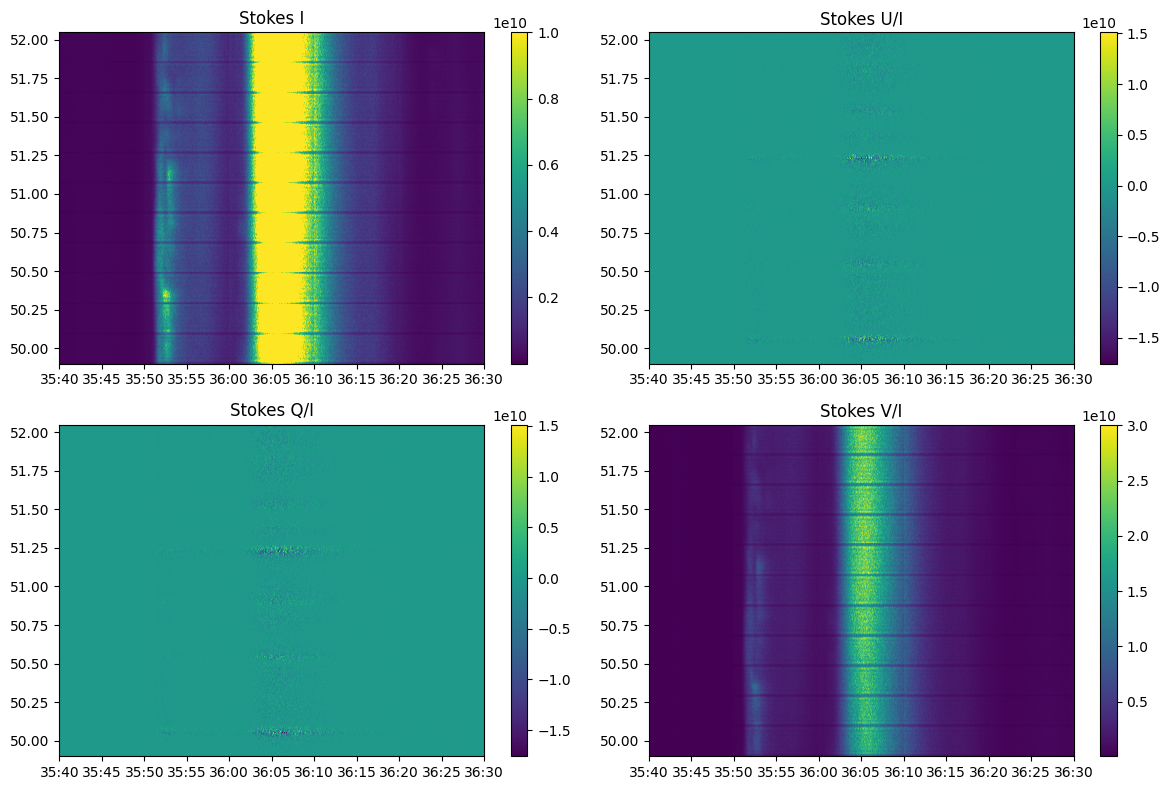

In [301]:
fig = plt.figure(figsize=[12,8])

ax  = fig.add_subplot(221)
real_flux = fluxes[:, :, 0].real
img = ax.pcolormesh(times, freqs, real_flux.T, vmin=1e2, vmax=1e10, shading='auto')
plt.colorbar(img)
ax.set_title('Stokes I')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

ax  = fig.add_subplot(222)
real_flux = fluxes[:, :, 1].real
img = ax.pcolormesh(times, freqs, real_flux.T, shading='auto')
plt.colorbar(img)
ax.set_title('Stokes U/I')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

ax  = fig.add_subplot(223)
real_flux = fluxes[:, :, 2].real
img = ax.pcolormesh(times, freqs, real_flux.T, shading='auto')
plt.colorbar(img)
ax.set_title('Stokes Q/I')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

ax  = fig.add_subplot(224)
real_flux = fluxes[:, :, 3].real
img = ax.pcolormesh(times, freqs, real_flux.T, shading='auto')
plt.colorbar(img)
ax.set_title('Stokes V/I')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

fig.tight_layout()
plt.show()

In [165]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.frequency_rebin())
sp.pipeline.info()

2025-04-29 17:18:28 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-29 17:18:28 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-29 17:18:28 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-29 17:18:28 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-29 17:18:28 | INFO: Computing time-frequency axes...
2025-04-29 17:18:28 | INFO: Re-organize data into Jones matrices...
2025-04-29 17:18:28 | INFO: 	Convert data to Dask array
2025-04-29 17:18:28 | INFO: Data loaded.
Pipeline configuration:
	(0 - Rebin in frequency)


2025-04-29 17:19:34 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-29 17:19:34 | INFO: 	2385 time samples selected.
2025-04-29 17:19:34 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-29 17:19:34 | INFO: 	352 frequency samples selected.
2025-04-29 17:19:34 | INFO: Pipeline configuration:
	0 - Rebin in frequency
2025-04-29 17:19:34 | INFO: Computing the data (estimated volume: 2.6e+01 Mibyte)...
[########################################] | 100% Completed | 204.20 ms
2025-04-29 17:19:34 | INFO: 	Data of shape (time, frequency, (polarization)) = (2385, 352, 2, 2) produced.
2025-04-29 17:19:34 | WARNING: Complex array found, only the real part is plotted.


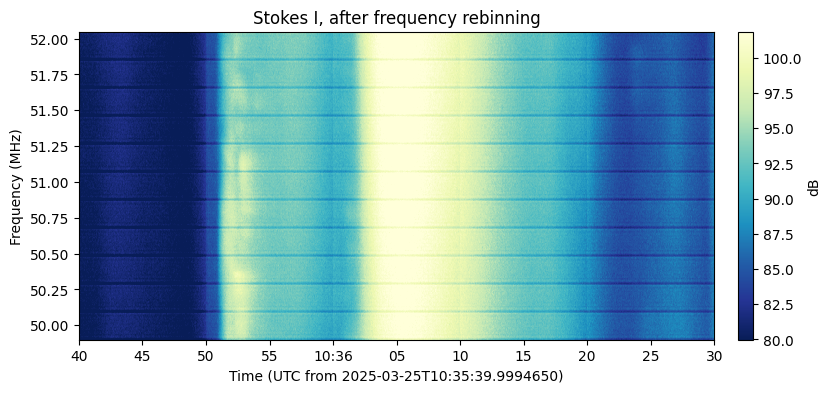

In [171]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get(stokes='I')
data.plot(figsize=[10,4], title='Stokes I, after frequency rebinning')

In [172]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.get_stokes())
sp.pipeline.info()

2025-04-29 17:38:25 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-29 17:38:25 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-29 17:38:25 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-29 17:38:25 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-29 17:38:25 | INFO: Computing time-frequency axes...
2025-04-29 17:38:25 | INFO: Re-organize data into Jones matrices...
2025-04-29 17:38:25 | INFO: 	Convert data to Dask array
2025-04-29 17:38:25 | INFO: Data loaded.
Pipeline configuration:
	0 - Compute Stokes parameters


2025-04-29 18:02:49 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-29 18:02:49 | INFO: 	2385 time samples selected.
2025-04-29 18:02:49 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-29 18:02:49 | INFO: 	352 frequency samples selected.
2025-04-29 18:02:49 | INFO: Pipeline configuration:
	0 - Compute Stokes parameters
2025-04-29 18:02:49 | INFO: Computing Stokes parameters ['I', 'U/I', 'Q/I', 'V/I']...
2025-04-29 18:02:49 | INFO: 	Stokes I computed.
2025-04-29 18:02:49 | INFO: 	Stokes U/I computed.
2025-04-29 18:02:49 | INFO: 	Stokes Q/I computed.
2025-04-29 18:02:49 | INFO: 	Stokes V/I computed.
2025-04-29 18:02:49 | INFO: Computing the data (estimated volume: 1.3e+01 Mibyte)...
[########################################] | 100% Completed | 204.29 ms
2025-04-29 18:02:49 | INFO: 	Data of shape (time, frequency, (polarization)) = (2385, 352, 4) produced.


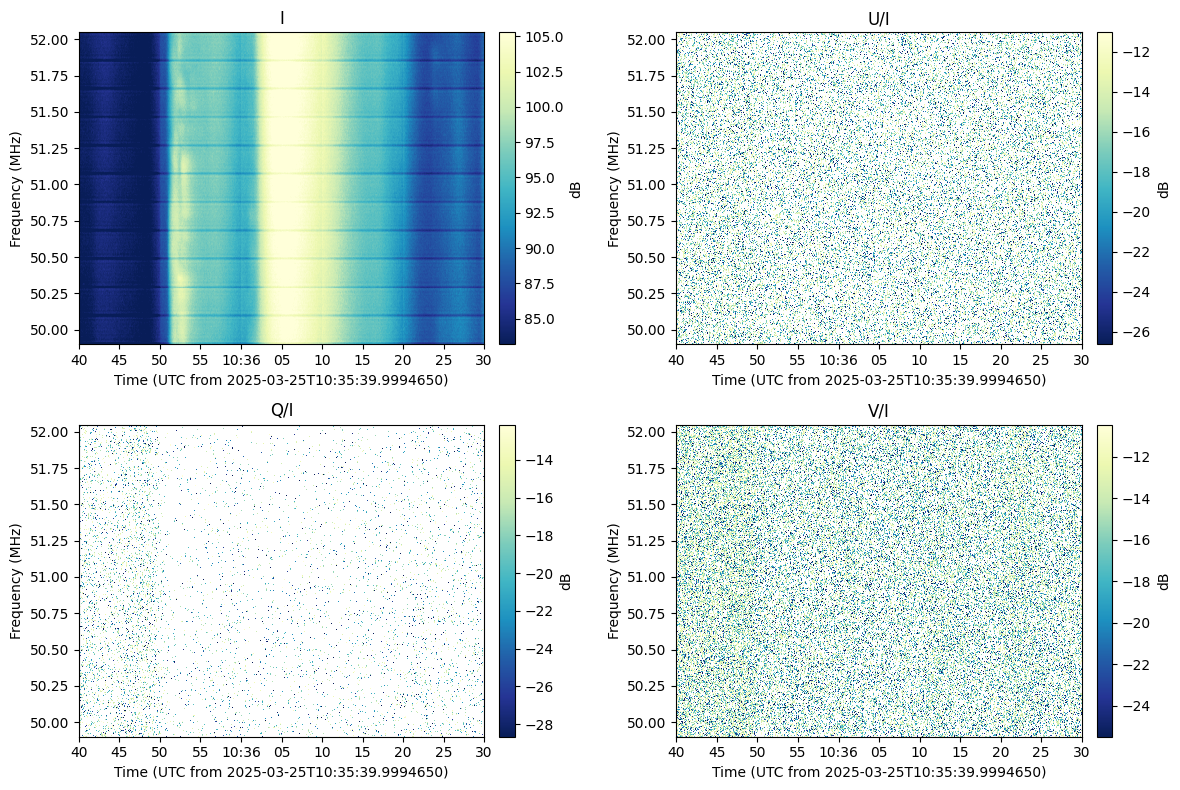

In [187]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get(stokes=['I', 'U/I', 'Q/I', 'V/I'])

fig = plt.figure(figsize=[12,8])
ax  = fig.add_subplot(221)
data.plot(ax=ax, polarization='I')
ax  = fig.add_subplot(222)
data.plot(ax=ax, polarization='U/I')
ax  = fig.add_subplot(223)
data.plot(ax=ax, polarization='Q/I')
ax  = fig.add_subplot(224)
data.plot(ax=ax, polarization='V/I')
fig.tight_layout()
plt.show()

In [198]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.mitigate_frequency_rfi(sigma_clip=2, polynomial_degree=4))
sp.pipeline.info()

2025-04-29 18:07:35 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-29 18:07:35 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-29 18:07:35 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-29 18:07:35 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-29 18:07:35 | INFO: Computing time-frequency axes...
2025-04-29 18:07:35 | INFO: Re-organize data into Jones matrices...
2025-04-29 18:07:35 | INFO: 	Convert data to Dask array
2025-04-29 18:07:35 | INFO: Data loaded.
Pipeline configuration:
	0 - Mitigate frequency RFI sig=2.00


2025-04-29 18:07:35 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-29 18:07:35 | INFO: 	2385 time samples selected.
2025-04-29 18:07:35 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-29 18:07:35 | INFO: 	352 frequency samples selected.
2025-04-29 18:07:35 | INFO: Pipeline configuration:
	0 - Mitigate frequency RFI sig=2.00
2025-04-29 18:07:35 | INFO: RFI mitigation over the spectral profile.
2025-04-29 18:07:35 | INFO: 	Computing the profile...
[########################################] | 100% Completed | 205.50 ms
[########################################] | 100% Completed | 407.80 ms
2025-04-29 18:07:36 | INFO: 	Polynomial fitting...
2025-04-29 18:07:36 | INFO: 	Clipping out data above 2 x background...
2025-04-29 18:07:36 | INFO: Computing the data (estimated volume: 2.6e+01 Mibyte)...
[########################################] | 100% Completed | 306.63 ms
2025-04-29 18:07:36 | INFO: 	Data of shape (time, fr

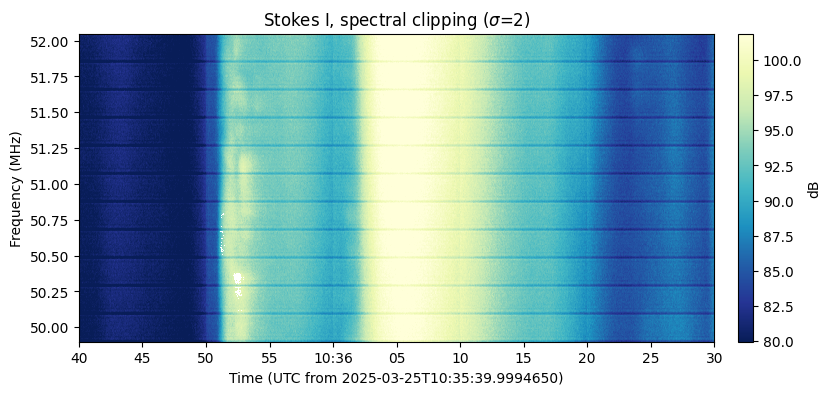

In [199]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get()
data.plot(figsize=[10,4], title='Stokes I, spectral clipping ($\sigma$=2)')

In [410]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.remove_channels())
sp.pipeline.info()

2025-04-30 15:17:39 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-30 15:17:39 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-30 15:17:39 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-30 15:17:39 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-30 15:17:39 | INFO: Computing time-frequency axes...
2025-04-30 15:17:39 | INFO: Re-organize data into Jones matrices...
2025-04-30 15:17:39 | INFO: 	Convert data to Dask array
2025-04-30 15:17:39 | INFO: Data loaded.
Pipeline configuration:
	(0 - Remove subband channels)


2025-04-30 15:17:40 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-30 15:17:40 | INFO: 	2385 time samples selected.
2025-04-30 15:17:40 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-30 15:17:40 | INFO: 	352 frequency samples selected.
2025-04-30 15:17:40 | INFO: Pipeline configuration:
	0 - Remove subband channels
2025-04-30 15:17:40 | INFO: Removing channels...
2025-04-30 15:17:40 | INFO: 	Channels [ 0 -1] set to NaN.
2025-04-30 15:17:40 | INFO: Computing the data (estimated volume: 2.6e+01 Mibyte)...
[########################################] | 100% Completed | 306.43 ms
2025-04-30 15:17:40 | INFO: 	Data of shape (time, frequency, (polarization)) = (2385, 352, 2, 2) produced.
2025-04-30 15:17:40 | WARNING: Complex array found, only the real part is plotted.


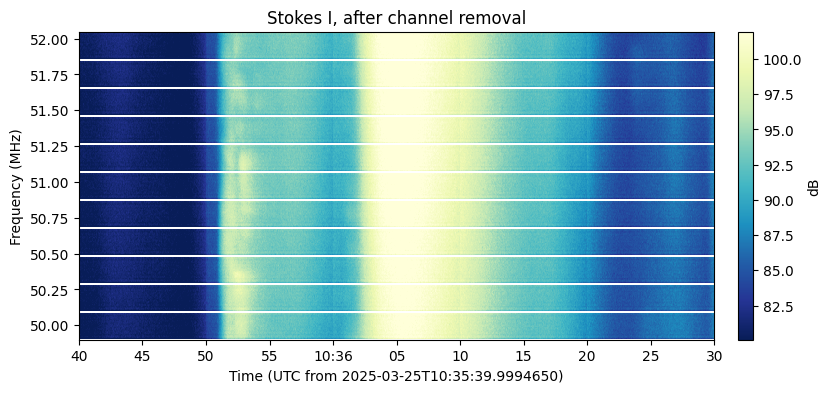

In [411]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get(remove_channels=[0, -1])
data.plot(figsize=[10,4], title='Stokes I, after channel removal')

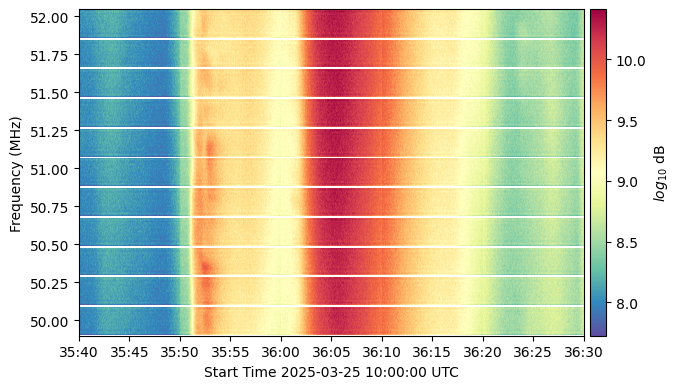

In [412]:
# Extract the frequencies from the data
freqs = data.freq.to_value()/1e6
# Extract the times from the data
times = np.array([datetime.utcfromtimestamp(t) for t in data.time.unix])
# Extract the intensities for Stokes I
flux = data.data[:,:,0].real
# Take log10 of the flux
log_flux = np.log10(flux)

fig = plt.figure(figsize=[7,4])
ax  = fig.add_subplot(111)
pc  = ax.pcolormesh(times, freqs, log_flux.T, shading='auto', cmap='Spectral_r')
ax.set_xlabel(f"Start Time {times[0].date()} {times[0].hour}:00:00 UTC")
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
fig.colorbar(pc, ax=ax, pad=0.01, label=r'$log_{10}$ dB')
fig.tight_layout()
plt.show()

In [432]:
from scipy.interpolate import interp1d

# Step 1: Identify frequency indices with all NaNs across time
bad_freqs = np.all(np.isnan(log_flux), axis=0)

# Step 2: Interpolate those bad freqs at each time step
log_flux_filled = log_flux.copy()
freq_indices    = np.arange(log_flux.shape[1])

for t in range(log_flux.shape[0]):
    spectrum = log_flux[t, :]
    
    # Find good frequency subbands (i.e., not all NaNs)
    good_mask = ~np.isnan(spectrum)
    
    if good_mask.sum() >= 2:  # Need at least two points for interpolation
        interp_func = interp1d(freq_indices[good_mask], spectrum[good_mask],
                               kind='linear', bounds_error=False, fill_value='extrapolate')
        # Fill NaNs in the spectrum
        log_flux_filled[t, bad_freqs] = interp_func(freq_indices[bad_freqs])
    else:
        # If not enough points to interpolate, skip or fill with zeros
        log_flux_filled[t, bad_freqs] = 0.0

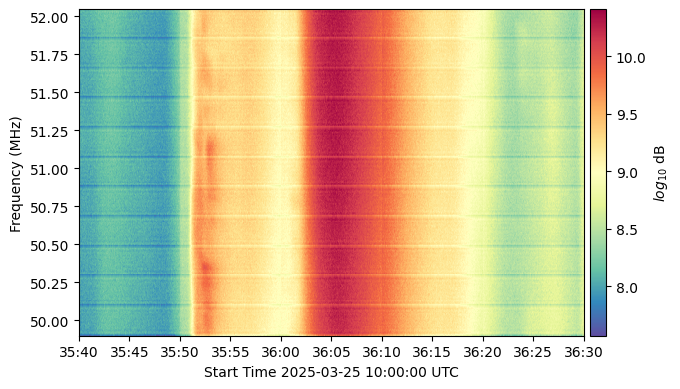

In [435]:
fig = plt.figure(figsize=[7,4])
ax  = fig.add_subplot(111)
pc  = ax.pcolormesh(times, freqs, log_flux_filled.T, shading='auto', cmap='Spectral_r')
ax.set_xlabel(f"Start Time {times[0].date()} {times[0].hour}:00:00 UTC")
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
fig.colorbar(pc, ax=ax, pad=0.01, label=r'$log_{10}$ dB')
fig.tight_layout()
plt.show()

In [437]:
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

def interpolate_wide_window(log_flux, window=5):
    log_flux_filled = log_flux.copy()
    n_times, n_freqs = log_flux.shape
    freq_indices = np.arange(n_freqs)

    for t in range(n_times):
        spectrum = log_flux[t, :]
        good_mask = ~np.isnan(spectrum)

        if np.sum(good_mask) < 2:
            continue  # Not enough data to interpolate

        # Use broader window by smoothing bad values from more distant neighbors
        valid_x = freq_indices[good_mask]
        valid_y = spectrum[good_mask]

        # Linear interpolation with extrapolation
        interp_func = interp1d(valid_x, valid_y, kind='linear', bounds_error=False, fill_value='extrapolate')

        nan_mask = np.isnan(spectrum)
        if np.any(nan_mask):
            # Interpolate only where needed
            log_flux_filled[t, nan_mask] = interp_func(freq_indices[nan_mask])

    return log_flux_filled

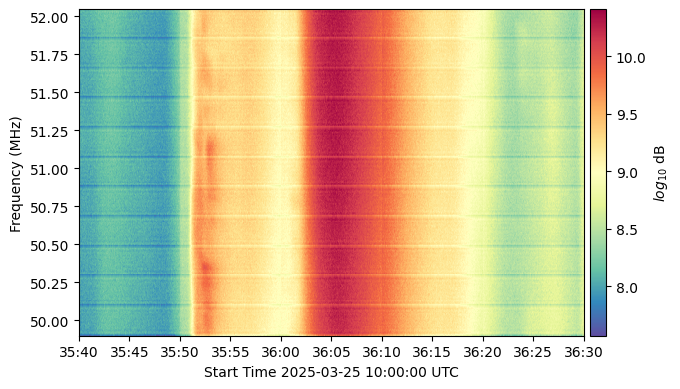

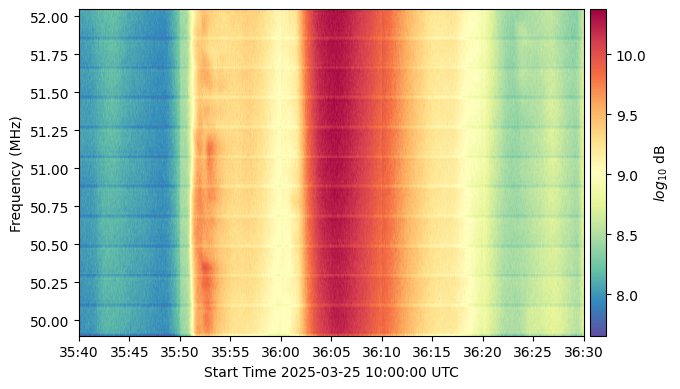

In [441]:
log_flux_filled = interpolate_wide_window(log_flux, window=5)

fig = plt.figure(figsize=[7,4])
ax  = fig.add_subplot(111)
pc  = ax.pcolormesh(times, freqs, log_flux_filled.T, shading='auto', cmap='Spectral_r')
ax.set_xlabel(f"Start Time {times[0].date()} {times[0].hour}:00:00 UTC")
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
fig.colorbar(pc, ax=ax, pad=0.01, label=r'$log_{10}$ dB')
fig.tight_layout()
plt.show()

# Apply along frequency axis (axis=1)
smoothed_flux = gaussian_filter1d(log_flux_filled, sigma=1, axis=1)

fig = plt.figure(figsize=[7,4])
ax  = fig.add_subplot(111)
pc  = ax.pcolormesh(times, freqs, smoothed_flux.T, shading='auto', cmap='Spectral_r')
ax.set_xlabel(f"Start Time {times[0].date()} {times[0].hour}:00:00 UTC")
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
fig.colorbar(pc, ax=ax, pad=0.01, label=r'$log_{10}$ dB')
fig.tight_layout()
plt.show()

In [393]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.remove_channels(), TFTask.frequency_rebin())

sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

sp.pipeline.info()

2025-04-30 14:43:45 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-30 14:43:46 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-30 14:43:46 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-30 14:43:46 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-30 14:43:46 | INFO: Computing time-frequency axes...
2025-04-30 14:43:46 | INFO: Re-organize data into Jones matrices...
2025-04-30 14:43:46 | INFO: 	Convert data to Dask array
2025-04-30 14:43:46 | INFO: Data loaded.
Pipeline configuration:
	(0 - Remove subband channels)
	(1 - Rebin in frequency)


2025-04-30 14:45:57 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-30 14:45:57 | INFO: 	2385 time samples selected.
2025-04-30 14:45:57 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-30 14:45:57 | INFO: 	352 frequency samples selected.
2025-04-30 14:45:57 | INFO: Pipeline configuration:
	0 - Remove subband channels
	1 - Rebin in frequency
2025-04-30 14:45:57 | INFO: Removing channels...
2025-04-30 14:45:57 | INFO: 	Channels [ 0 -1] set to NaN.
2025-04-30 14:45:57 | INFO: Rebinning in frequency...
2025-04-30 14:45:57 | INFO: 	dx: 6103.515625 | new_dx: 20000.0 -> rebin factor: 3.
2025-04-30 14:45:57 | INFO: 	Data rebinned, last 1 samples were not considered.
2025-04-30 14:45:57 | INFO: Computing the data (estimated volume: 8.5 Mibyte)...
[########################################] | 100% Completed | 306.35 ms
2025-04-30 14:45:58 | INFO: 	Data of shape (time, frequency, (polarization)) = (2385, 117, 2, 2) produced.

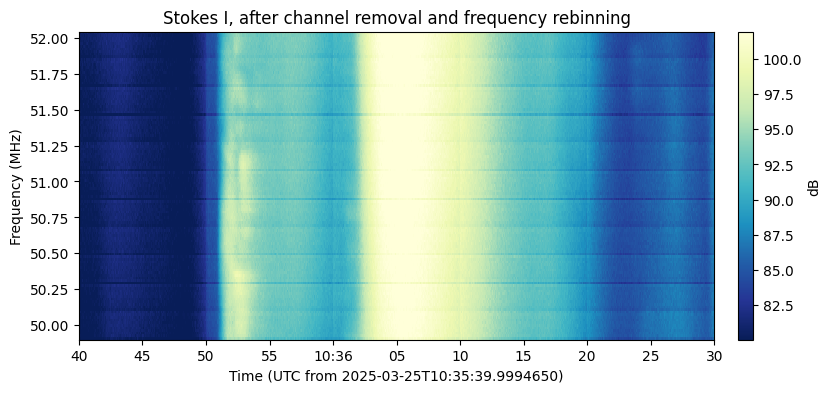

In [408]:
data = sp.get(remove_channels=[0, -1], rebin_df=20*u.kHz)
data.plot(figsize=[10,4], title='Stokes I, after channel removal and frequency rebinning')

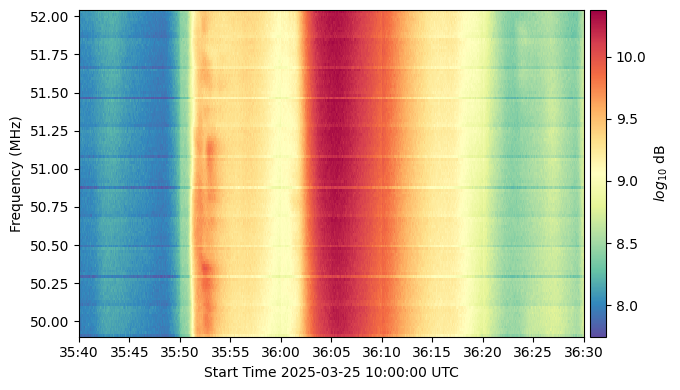

In [409]:
# Extract the frequencies from the data
freqs = data.freq.to_value()/1e6
# Extract the times from the data
times = np.array([datetime.utcfromtimestamp(t) for t in data.time.unix])
# Extract the intensities for Stokes I
flux = data.data[:,:,0].real
# Take log10 of the flux
log_flux = np.log10(flux)

fig = plt.figure(figsize=[7,4])
ax  = fig.add_subplot(111)
pc  = ax.pcolormesh(times, freqs, log_flux.T, shading='auto', cmap='Spectral_r')
ax.set_xlabel(f"Start Time {times[0].date()} {times[0].hour}:00:00 UTC")
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
fig.colorbar(pc, ax=ax, pad=0.01, label=r'$log_{10}$ dB')
fig.tight_layout()
plt.show()

In [203]:
sp = Spectra(filename)
sp.pipeline = TFPipeline(sp, TFTask.time_rebin())
sp.pipeline.info()

2025-04-29 18:09:55 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-29 18:09:55 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-29 18:09:55 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-29 18:09:55 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-29 18:09:55 | INFO: Computing time-frequency axes...
2025-04-29 18:09:55 | INFO: Re-organize data into Jones matrices...
2025-04-29 18:09:55 | INFO: 	Convert data to Dask array
2025-04-29 18:09:55 | INFO: Data loaded.
Pipeline configuration:
	(0 - Rebin in time)


2025-04-29 18:10:27 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:30.000)...
2025-04-29 18:10:27 | INFO: 	2385 time samples selected.
2025-04-29 18:10:27 | INFO: Selecting frequencies (between 50.0 MHz and 52.0 MHz)...
2025-04-29 18:10:27 | INFO: 	352 frequency samples selected.
2025-04-29 18:10:27 | INFO: Pipeline configuration:
	0 - Rebin in time
2025-04-29 18:10:27 | INFO: Rebinning in time...
2025-04-29 18:10:27 | INFO: 	dx: 0.02097152 | new_dx: 0.2 -> rebin factor: 9.
2025-04-29 18:10:27 | INFO: 	Data rebinned, last 0 samples were not considered.
2025-04-29 18:10:27 | INFO: Computing the data (estimated volume: 2.8 Mibyte)...
[########################################] | 100% Completed | 307.81 ms
2025-04-29 18:10:28 | INFO: 	Data of shape (time, frequency, (polarization)) = (265, 352, 2, 2) produced.
2025-04-29 18:10:28 | WARNING: Complex array found, only the real part is plotted.


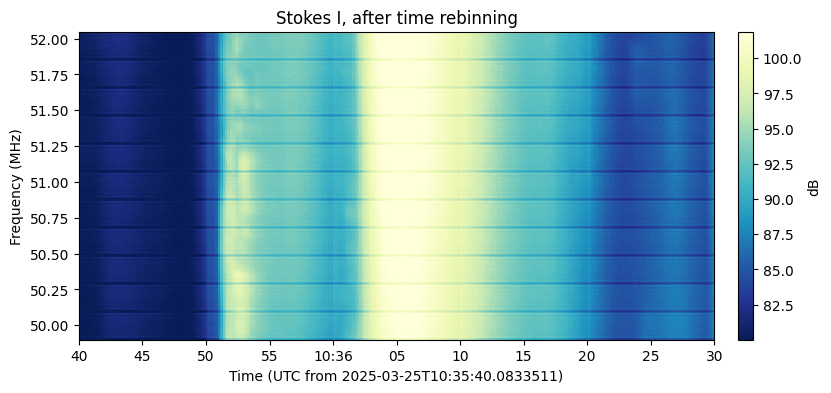

In [204]:
sp.pipeline.parameters['tmin'] = Time('2025-03-25 10:35:40', format='iso')
sp.pipeline.parameters['tmax'] = Time('2025-03-25 10:36:30', format='iso')
sp.pipeline.parameters['fmin'] = 50*u.MHz
sp.pipeline.parameters['fmax'] = 52*u.MHz

data = sp.get(rebin_dt=0.2*u.s)
data.plot(figsize=[10,4], title='Stokes I, after time rebinning')

---

Troubleshooting

In [89]:
times = np.array([datetime.utcfromtimestamp(t) for t in data.time.unix], dtype='datetime64[us]')
freqs = data.freq.to_value

In [112]:
data.amp.shape, data.background.shape, data.db.shape, data.fbackground.shape

((2385, 352), (2385, 352, 1), (2385, 352), (2385, 352, 1))

In [107]:
data_amp = data.amp
data_bkg = np.squeeze(data.background)
data_db  = data.db
data_fbkg = np.squeeze(data.fbackground)

(2385, 352)

In [101]:
data_arr = np.squeeze(data.data)
data_arr.shape

(2385, 352)